In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

In [3]:
trainvar = pd.read_csv('training_variants')
traintex = pd.read_csv('training_text', sep='\|\|', header=None, names=['ID','Text'], skiprows=[0])
train = pd.merge(trainvar, traintex, on='ID')

/home/arun/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
trainvar = pd.read_csv('test_variants')
traintex = pd.read_csv('test_text', sep='\|\|', header=None, names=['ID','Text'], skiprows=[0])
test = pd.merge(trainvar, traintex, on='ID')

/home/arun/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
train.Text = train.Text.str.lower()
test.Text = test.Text.str.lower()
l = stopwords.words('english').append(['well','determine'])
for words in stopwords.words('english'):
    test.Text = test.Text.str.replace(' '+words+' ', '')
    train.Text = train.Text.str.replace(' '+words+' ', '')
train.Text = train.Text.str.split()
test.Text = test.Text.str.split()

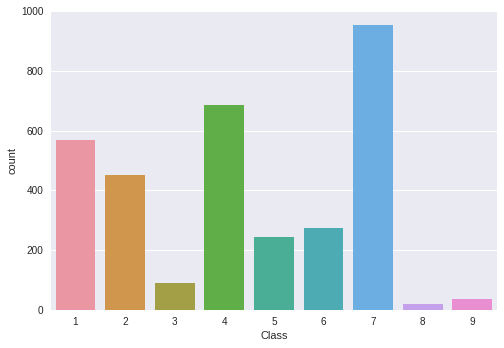

In [4]:
sns.countplot(x='Class',data=train)
plt.show()

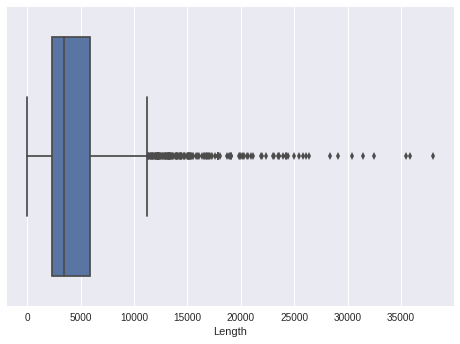

In [8]:
train = train.assign(Length= [len(t) for t in train.Text])
sns.barplot(x='Class',y='Length',data=train)
plt.show()

In [ ]:
train = train.assign(Length= [len(t) for t in train.Text])
sns.boxplot(x='Length',data=train)
plt.show()

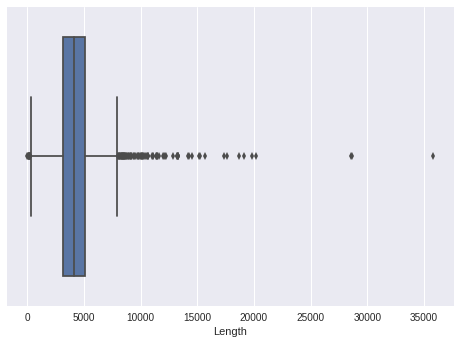

In [9]:
test = test.assign(Length= [len(t) for t in test.Text])
sns.boxplot(x='Length',data=test)
plt.show()

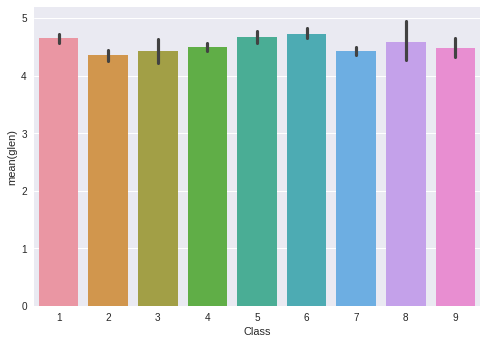

In [10]:
train = train.assign(glen= [len(g) for g in train.Gene])
sns.barplot(x='Class',y='glen',data=train)
plt.show()

In [11]:
max(train.glen)

8

In [20]:
ord('a')

97

In [7]:
for i in range(1,10):
    print(train.loc[train.Class==i].Length.mean())

9450.299295774648
9310.393805309735
6757.38202247191
8983.390670553936
7517.0495867768595
7184.12
11442.86778593914
10814.421052631578
12807.45945945946


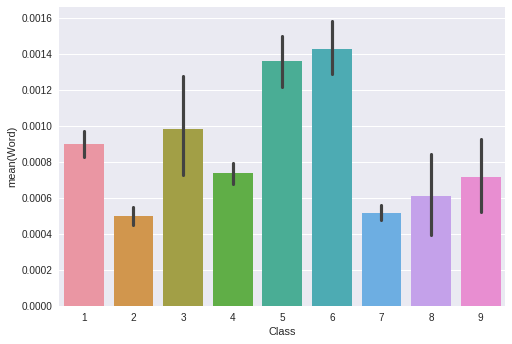

In [6]:
train = train.assign(Word= [t.count('sequence')/len(t) for t in train.Text])
sns.barplot(x='Class',y='Word',data=train)
plt.show()

In [8]:
for word in train.Text[0]:
    train.Word = [t.count(word)*100000000/len(t) for t in train.Text]
    means = train.groupby('Class')['Word'].mean()
    common=True
    for m in means:
        if not (means.mean()-means.std())/2< m <(means.mean()+means.std())/2:
            common=False
    if common:
        print (word)

KeyboardInterrupt: 

In [58]:
def genebyclass(num):
    cla = train.loc[train['Class']==num]
    sns.countplot(x='Gene', data=cla)
    plt.show()

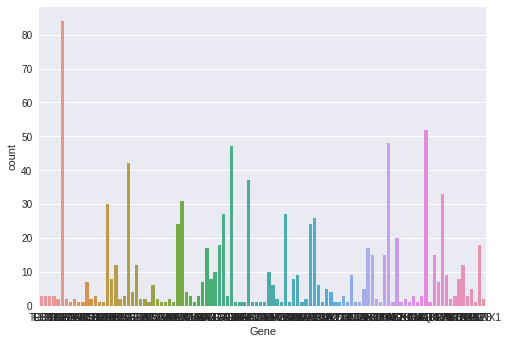

In [63]:
genebyclass(7)

In [14]:
print(train.Variation.count())
print(len(train.Variation.unique()))

3321
2996


In [15]:
print(train.Gene.count())
print(len(train.Gene.unique()))

3321
264


In [16]:
train.head()

,ID,Gene,Variation,Class,Text,Length,glen
0,0,FAM58A,Truncating Mutations,1,"[cyclin-dependent, kinases, (cdks), regulateva...",2865,6
1,1,CBL,W802*,2,"[abstract, background, non-small, cell, lung, ...",2672,3
2,2,CBL,Q249E,2,"[abstract, background, non-small, cell, lung, ...",2672,3
3,3,CBL,N454D,3,"[recent, evidencedemonstratedacquired, unipare...",2615,3
4,4,CBL,L399V,4,"[oncogenic, mutations, inmonomeric, casitas, b...",2873,3


In [15]:
train.Gene = train.Gene.str.upper()
#eneEncode = ['0','1','2','3','4','5','6','7','8','9',A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z]
geneLength = 8

def geneVec(gene):
    array = np.zeros((geneLength, 36))
    i=0
    for c in gene:
        if c.isdigit():
            array[i,int(c)] = 1
        else:
            array[i,10+ord(c)-ord('A')]=1
        i += 1
        print(i)
    return array
        
geneVec(train.Gene[0])

1
2
3
4
5
6


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  

In [16]:
train.Gene[0]

'FAM58A'